In [2]:
from scipy.io import arff
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = arff.loadarff('./hw1/4year.arff')
df = pd.DataFrame(data[0])
df['bankruptcy'] = (df['class']==b'1')
del df['class']
df.columns = ['X{0:02d}'.format(k) for k in range(1,65)] + ['bankruptcy']
df.describe()

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imp = imp_mean.fit_transform(df.values)

In [74]:


X, y = X_imp[:, :-1], X_imp[:, -1]

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [75]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [76]:
C_grid = [0.001, 0.01, 0.1, 1, 10]


for c in C_grid:
    lr = LogisticRegression(C = c, penalty = 'l1', solver='liblinear', max_iter = 150) 
    lr.fit(X_train_std, y_train)
    print(c, lr.coef_[lr.coef_!=0].shape)

0.001 (0,)
0.01 (2,)
0.1 (14,)
1 (42,)
10 (56,)


In [77]:
lr = LogisticRegression(C = 0.01, penalty = 'l1', solver='liblinear', max_iter = 150) 
lr.fit(X_train_std, y_train)

y_tmp = y_test

print(lr.coef_!=0)
X_train_selected = X_train_std[:, lr.coef_[0]!=0]
X_test_selected = X_test_std[:, lr.coef_[0]!=0]
print(X_test_selected.shape, y_test.shape)
y_test = y_tmp[(X_test_selected[:, 1]>-200)]
X_test_selected = X_test_selected[X_test_selected[:, 1]>-200]
print(X_test_selected.shape, y_test.shape)


[[ True False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False  True False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False]]
(2938, 2) (2938,)
(2937, 2) (2937,)


Apply LR / SVM / Decision Tree below

In [78]:
# lr = LogisticRegression(C = 0.1)
# lr.fit(X_train_selected, y_train)

# print('Training accuracy:', lr.score(X_train_selected, y_train))
# print('Test accuracy:', lr.score(X_test_selected, y_test))


estimators = []

In [79]:
estimator = LogisticRegression()
param_grid={'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid=GridSearchCV(estimator,param_grid=param_grid,cv=5)             
grid.fit(X_train_selected,y_train)
print('the best paras are :{}\nand the training score are:{}'.format(grid.best_params_, grid.best_score_))
print('Test accuracy:', grid.score(X_test_selected, y_test))

estimators.append(grid)
pd.DataFrame(grid.cv_results_)

the best paras are :{'C': 0.001}
and the training score are:0.947475815511082
Test accuracy: 0.9472250595846101


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.012199      0.002133         0.000802        0.000401   0.001   
1       0.013801      0.001471         0.000797        0.000399    0.01   
2       0.020200      0.010249         0.000801        0.000401     0.1   
3       0.008598      0.001496         0.000601        0.000490       1   
4       0.008202      0.001470         0.000602        0.000491      10   
5       0.008505      0.001001         0.000800        0.000400     100   

         params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.001}           0.947484           0.947484           0.947484   
1   {'C': 0.01}           0.946754           0.947484           0.946025   
2    {'C': 0.1}           0.946025           0.947484           0.946025   
3      {'C': 1}           0.946025           0.947484           0.946025   
4     {'C': 10}           0.946025           0.947484           0.946025   
5    {'C': 100}           0.946025           0.947484           0.946025   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.948213           0.946715         0.947476        0.000474   
1           0.948213           0.946715         0.947038        0.000747   
2           0.948213           0.946715         0.946892        0.000852   
3           0.948213           0.946715         0.946892        0.000852   
4           0.948213           0.946715         0.946892        0.000852   
5           0.948213           0.946715         0.946892        0.000852   

   rank_test_score  
0                1  
1                2  
2                3  
3                3  
4                3  
5                3

In [80]:
estimator = SVC()
param_grid = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.1, 1, 10]}
# svc = svm.SVC()

grid=GridSearchCV(estimator,param_grid=param_grid,cv=5)             
grid.fit(X_train_selected,y_train)
print('the best paras are :{}\nand the training score are:{}'.format(grid.best_params_, grid.best_score_))
print('Test accuracy:', grid.score(X_test_selected, y_test))

estimators.append(grid)
pd.DataFrame(grid.cv_results_)

the best paras are :{'C': 0.01, 'kernel': 'linear'}
and the training score are:0.9474759219920459
Test accuracy: 0.9472250595846101


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.047636      0.007937         0.009486        0.003797    0.01   
1       0.098985      0.010617         0.017733        0.000707    0.01   
2       0.052508      0.003047         0.008400        0.001355     0.1   
3       0.119666      0.013251         0.020869        0.006618     0.1   
4       0.166229      0.034741         0.009478        0.002337       1   
5       0.363881      0.088688         0.032009        0.007340       1   
6       1.004300      0.209185         0.008408        0.001850      10   
7       1.146904      0.109379         0.031867        0.004012      10   

  param_kernel                           params  split0_test_score  \
0       linear  {'C': 0.01, 'kernel': 'linear'}           0.947484   
1          rbf     {'C': 0.01, 'kernel': 'rbf'}           0.947484   
2       linear   {'C': 0.1, 'kernel': 'linear'}           0.947484   
3          rbf      {'C': 0.1, 'kernel': 'rbf'}           0.947484   
4       linear     {'C': 1, 'kernel': 'linear'}           0.947484   
5          rbf        {'C': 1, 'kernel': 'rbf'}           0.947484   
6       linear    {'C': 10, 'kernel': 'linear'}           0.947484   
7          rbf       {'C': 10, 'kernel': 'rbf'}           0.948213   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.947484           0.947484           0.947484           0.947445   
1           0.947484           0.947484           0.947484           0.947445   
2           0.947484           0.947484           0.947484           0.947445   
3           0.947484           0.947484           0.947484           0.947445   
4           0.947484           0.947484           0.947484           0.947445   
5           0.947484           0.947484           0.947484           0.947445   
6           0.947484           0.947484           0.947484           0.947445   
7           0.947484           0.947484           0.946754           0.947445   

   mean_test_score  std_test_score  rank_test_score  
0         0.947476        0.000015                1  
1         0.947476        0.000015                1  
2         0.947476        0.000015                1  
3         0.947476        0.000015                1  
4         0.947476        0.000015                1  
5         0.947476        0.000015                1  
6         0.947476        0.000015                1  
7         0.947476        0.000462                1

In [81]:
estimator = DecisionTreeClassifier()
param_grid = {'criterion':('gini', 'entropy'), 'max_depth':np.arange(1, 21), 'min_samples_leaf':[1, 5, 10, 50, 100]}
# svc = svm.SVC()

grid=GridSearchCV(estimator,param_grid=param_grid,cv=5)             
grid.fit(X_train_selected,y_train)
print('the best paras are :{}\nand the training score are:{}'.format(grid.best_params_, grid.best_score_))
print('Test accuracy:', grid.score(X_test_selected, y_test))

estimators.append(grid)
pd.DataFrame(grid.cv_results_)

the best paras are :{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}
and the training score are:0.9474759219920459
Test accuracy: 0.9472250595846101


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.008593      0.007072         0.001597        0.000793   
1         0.010203      0.013415         0.001204        0.000989   
2         0.003201      0.000399         0.000596        0.000487   
3         0.003397      0.000799         0.000200        0.000400   
4         0.002607      0.000496         0.000596        0.000487   
..             ...           ...              ...             ...   
195       0.068001      0.014391         0.001601        0.001202   
196       0.045602      0.007736         0.001199        0.000748   
197       0.034998      0.009570         0.001202        0.000401   
198       0.022996      0.005061         0.001203        0.000401   
199       0.020198      0.002040         0.001002        0.000002   

    param_criterion param_max_depth param_min_samples_leaf  \
0              gini               1                      1   
1              gini               1                      5   
2              gini               1                     10   
3              gini               1                     50   
4              gini               1                    100   
..              ...             ...                    ...   
195         entropy              20                      1   
196         entropy              20                      5   
197         entropy              20                     10   
198         entropy              20                     50   
199         entropy              20                    100   

                                                params  split0_test_score  \
0    {'criterion': 'gini', 'max_depth': 1, 'min_sam...           0.947484   
1    {'criterion': 'gini', 'max_depth': 1, 'min_sam...           0.947484   
2    {'criterion': 'gini', 'max_depth': 1, 'min_sam...           0.947484   
3    {'criterion': 'gini', 'max_depth': 1, 'min_sam...           0.947484   
4    {'criterion': 'gini', 'max_depth': 1, 'min_sam...           0.947484   
..                                                 ...                ...   
195  {'criterion': 'entropy', 'max_depth': 20, 'min...           0.911743   
196  {'criterion': 'entropy', 'max_depth': 20, 'min...           0.930708   
197  {'criterion': 'entropy', 'max_depth': 20, 'min...           0.947484   
198  {'criterion': 'entropy', 'max_depth': 20, 'min...           0.947484   
199  {'criterion': 'entropy', 'max_depth': 20, 'min...           0.947484   

     split1_test_score  split2_test_score  split3_test_score  \
0             0.947484           0.947484           0.947484   
1             0.947484           0.947484           0.947484   
2             0.947484           0.947484           0.947484   
3             0.947484           0.947484           0.947484   
4             0.947484           0.947484           0.947484   
..                 ...                ...                ...   
195           0.913931           0.911014           0.899344   
196           0.933625           0.928519           0.927790   
197           0.939460           0.940919           0.943107   
198           0.947484           0.947484           0.947484   
199           0.947484           0.947484           0.947484   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
0             0.947445         0.947476        0.000015                1  
1             0.947445         0.947476        0.000015                1  
2             0.947445         0.947476        0.000015                1  
3             0.947445         0.947476        0.000015                1  
4             0.947445         0.947476        0.000015                1  
..                 ...              ...             ...              ...  
195           0.918978         0.911002        0.006460              197  
196           0.932847         0.930698        0.002297              181  
197           0.945985         0.943391        0.003004       

In [82]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

(9791, 2)


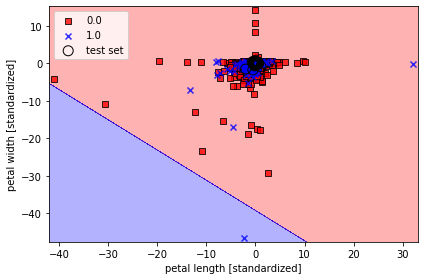

In [87]:
X_combined_std = np.vstack((X_train_selected, X_test_selected))
y_combined = np.hstack((y_train, y_test))
print(X_combined_std.shape)

plot_decision_regions(X=X_combined_std, y=y_combined,
                          classifier=estimators[0], test_idx=range(0, 50))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()


(9791, 2)


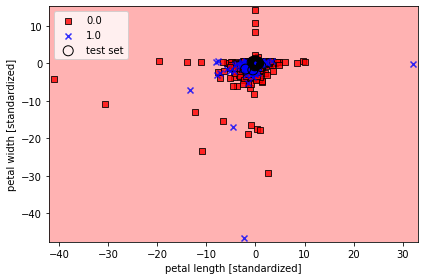

In [88]:
X_combined_std = np.vstack((X_train_selected, X_test_selected))
y_combined = np.hstack((y_train, y_test))
print(X_combined_std.shape)

plot_decision_regions(X=X_combined_std, y=y_combined,
                          classifier=estimators[1], test_idx=range(0, 50))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()


(9791, 2)


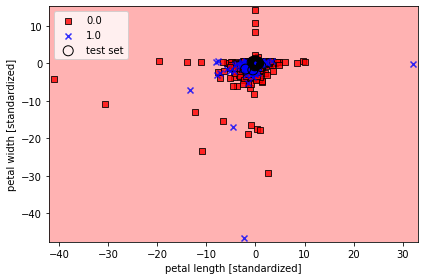

In [89]:
X_combined_std = np.vstack((X_train_selected, X_test_selected))
y_combined = np.hstack((y_train, y_test))
print(X_combined_std.shape)

plot_decision_regions(X=X_combined_std, y=y_combined,
                          classifier=estimators[2], test_idx=range(0, 50))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()


In [90]:
# for lr in estimators:
#     plot_decision_regions(X=X_combined_std, y=y_combined,
#                           classifier=lr, test_idx=range(0, 50))
#     plt.xlabel('petal length [standardized]')
#     plt.ylabel('petal width [standardized]')
#     plt.legend(loc='upper left')

#     plt.tight_layout()
#     #plt.savefig('images/03_01.png', dpi=300)
#     plt.show()
estimators

[GridSearchCV(cv=5, error_score=nan,
              estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                           fit_intercept=True,
                                           intercept_scaling=1, l1_ratio=None,
                                           max_iter=100, multi_class='auto',
                                           n_jobs=None, penalty='l2',
                                           random_state=None, solver='lbfgs',
                                           tol=0.0001, verbose=0,
                                           warm_start=False),
              iid='deprecated', n_jobs=None,
              param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
              pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
              scoring=None, verbose=0),
 GridSearchCV(cv=5, error_score=nan,
              estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                            class_weight=None, coef0=0.